<a href="https://colab.research.google.com/github/aryanpatil1503/AI/blob/main/ao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Git and Drive Integration

In [11]:
from __future__ import print_function
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.optim.lr_scheduler import StepLR
import time
import matplotlib.pyplot as plt
import numpy as np

### Mount google drive

In [2]:
# Mount google drive to use a persistent directory structure
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### Clone the assignment repository

In [3]:
# Create a directory for the course
%mkdir /content/gdrive/MyDrive/ece5545
%cd /content/gdrive/MyDrive/ece5545

# Create files to hold your Github token and username.
!echo 'YOUR_TOKEN' > /content/gdrive/MyDrive/ece5545/token.txt
!echo 'YOUR_HANDLE' > /content/gdrive/MyDrive/ece5545/git_username.txt

# TODO: Navigate to the created files and replace the contents with your token and username.
# Do NOT place your token inside of the notebook. This way there is no risk that you will push it to your repo.
# Never share your token with anyone, it is basically your github password!

mkdir: cannot create directory ‘/content/gdrive/MyDrive/ece5545’: File exists
/content/gdrive/MyDrive/ece5545


In [4]:
with open('/content/gdrive/MyDrive/ece5545/token.txt') as f:
    token = f.readline().strip()
# Use another file to store your github username
with open('/content/gdrive/MyDrive/ece5545/git_username.txt') as f:
    handle = f.readline().strip()

YOUR_TOKEN = token
YOUR_HANDLE = handle

!git clone https://{YOUR_TOKEN}@github.com/ML-HW-SYS/a0-{YOUR_HANDLE}.git a0

Cloning into 'a0'...
remote: Enumerating objects: 40, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 40 (delta 3), reused 3 (delta 3), pack-reused 29 (from 2)
Receiving objects: 100% (40/40), 15.60 KiB | 1.20 MiB/s, done.
Resolving deltas: 100% (6/6), done.


### Add `src` directory to the Python import path

In [5]:
# import functions from the src directory in repo
import sys
sys.path.insert(0, '/content/gdrive/MyDrive/ece5545/a0/src')

### Import functions from `src/train_utils.py`

In [6]:
import train_utils
from model import *

### Make changes to `src` files and push to repo

In [7]:
# You will likely need to set your git user identification settings
!git config --global user.email "ap2365@cornell.edu"  # update with your email
!git config --global user.name "Aryan Patil"   # update with your name

In [8]:
# To run the same tests that are run on Github Classroom
%cd /content/gdrive/MyDrive/ece5545/a0
!python3 -m pytest

/content/gdrive/MyDrive/ece5545/a0
======================================= test session starts ========================================
platform linux -- Python 3.11.11, pytest-8.3.4, pluggy-1.5.0
rootdir: /content/gdrive/MyDrive/ece5545/a0
plugins: langsmith-0.3.2, anyio-3.7.1, typeguard-4.4.1
collected 1 item                                                                                   

tests/test_model.py .                                                                        [100%]

======================================== 1 passed in 2.38s =========================================


In [9]:
%cd /content/gdrive/MyDrive/ece5545/a0/src
# Navigate to a0/src/model.py and fix the bug (denoted by TODO)
# in the file then commit the changes below
!git commit -am "fixed bug in model.py"
!git push

/content/gdrive/MyDrive/ece5545/a0/src
On branch main
Your branch is up to date with 'origin/main'.

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	__pycache__/
	../tests/__pycache__/

nothing added to commit but untracked files present (use "git add" to track)
Everything up-to-date


In [17]:
# 1Navigate to your repo
%cd /content/gdrive/MyDrive/ece5545/a0/src

# Pull the latest changes first to avoid conflicts
!git pull origin main --rebase

# Stage only modified files
!git add model.py

# 4Commit the changes
!git commit -m "Fixed bug in model.py"

# 5Push the changes
!git push origin main


/content/gdrive/MyDrive/ece5545/a0/src
From https://github.com/ML-HW-SYS/a0-aryanpatil1503
 * branch            main       -> FETCH_HEAD
Already up to date.
On branch main
Your branch is up to date with 'origin/main'.

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	__pycache__/
	../tests/__pycache__/

nothing added to commit but untracked files present (use "git add" to track)
Everything up-to-date


## Training Configuration

In [ ]:
batch_size = 128
epochs = 5
lr = 1.0
gamma = 0.7
no_cuda = False
seed = 42
log_interval = 50
save_model = False
dry_run = False

# Derived parameters
use_cuda = not no_cuda and torch.cuda.is_available()
torch.manual_seed(seed)
device = torch.device("cuda" if use_cuda else "cpu")

train_kwargs = {'batch_size': batch_size}
test_kwargs = {'batch_size': batch_size}
if use_cuda:
    cuda_kwargs = {'num_workers': 1,
                   'pin_memory': True,
                   'shuffle': True}
    train_kwargs.update(cuda_kwargs)
    test_kwargs.update(cuda_kwargs)

## Data Loaders and Optimizer Setup

In [ ]:
transform=transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
    ])
dataset1 = datasets.MNIST('/content/gdrive/MyDrive/ece5545/data', train=True, download=True,
                    transform=transform)
dataset2 = datasets.MNIST('/content/gdrive/MyDrive/ece5545/data', train=False,
                       transform=transform)
train_loader = torch.utils.data.DataLoader(dataset1,**train_kwargs)
test_loader = torch.utils.data.DataLoader(dataset2, **test_kwargs)

model = Net().to(device)
optimizer = optim.Adadelta(model.parameters(), lr=lr)

scheduler = StepLR(optimizer, step_size=1, gamma=gamma)

In [ ]:
batch_size = [32, 64, 128]
epochs = 5
lr = 1.0
gamma = 0.7
no_cuda = False
seed = 42
log_interval = 50
save_model = False
dry_run = False
# Derived parameters
use_cuda = not no_cuda and torch.cuda.is_available()
torch.manual_seed(seed)
device = torch.device("cuda" if use_cuda else "cpu")
for b in batch_size:
  print("Batch size: ",b)
  train_kwargs = {'batch_size': b}
  test_kwargs = {'batch_size': b}
  if use_cuda:
    cuda_kwargs = {'num_workers': 1,
    'pin_memory': True,
    'shuffle': True}
    train_kwargs.update(cuda_kwargs)
    test_kwargs.update(cuda_kwargs)
  for epoch in range(1, epochs + 1):
    train_utils.train(model, device, train_loader, optimizer, epoch, log_interval, dry_run)
    train_utils.test(model, device, test_loader)
    scheduler.step()
  if save_model:
    torch.save(model.state_dict(), "mnist_cnn.pt")


## Training Loop

In [ ]:
import importlib
importlib.reload(train_utils)
# we use importlib to make sure that we are loading
# the latest version of train_utils after any changes
# that you may have done

for epoch in range(1, epochs + 1):
    train_utils.train(model, device, train_loader, optimizer, epoch, log_interval, dry_run)
    train_utils.test(model, device, test_loader)
    scheduler.step()

if save_model:
    torch.save(model.state_dict(), "mnist_cnn.pt")

In [12]:
gpu_batchsize_32 = [19.74, 21.79, 20.42, 19.25, 20.79]
cpu_batchsize_32 = [169.93, 175.49, 175.58, 175.7, 181.77]
gpu_batchsize_64 = [15.96, 15.58, 16.88, 16.15, 16.83]
cpu_batchsize_64 = [175.04, 177.16,175.9, 176.5, 176.22]
gpu_batchsize_128 = [14.12, 13.52, 13.39, 13.47, 13.23]
cpu_batchsize_128 = [176.81, 175.62, 177.53, 175.05, 177.81]
mean_gpu = np.mean(gpu_batchsize_128)
std_dev_gpu = np.std(gpu_batchsize_128)
print("Mean GPU Time: ", mean_gpu)
print("Standard Deviation GPU Time: ", std_dev_gpu)
mean_cpu = np.mean(cpu_batchsize_128)
std_dev_cpu = np.std(cpu_batchsize_128)
print("Mean CPU Time: ", mean_cpu)
print("Standard Deviation CPU Time: ", std_dev_cpu)
gpu_batchsize_256 = [12.73, 13.03, 13.47, 13.78, 13.75]
cpu_batchsize_256 = [197.45, 206.12, 210.27, 203.97, 215.37]

Mean GPU Time:  13.546000000000001
Standard Deviation GPU Time:  0.3033545780106173
Mean CPU Time:  176.564
Standard Deviation CPU Time:  1.0704690560684103


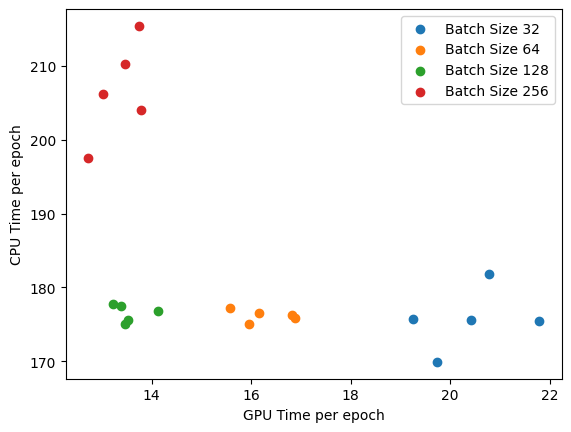

In [14]:
batchsize_32 = plt.scatter(gpu_batchsize_32, cpu_batchsize_32)
batchsize_64 = plt.scatter(gpu_batchsize_64, cpu_batchsize_64)
batchsize_128 = plt.scatter(gpu_batchsize_128, cpu_batchsize_128)
batchsize_256 = plt.scatter(gpu_batchsize_256, cpu_batchsize_256)
plt.xlabel('GPU Time per epoch')
plt.ylabel('CPU Time per epoch')
plt.legend((batchsize_32, batchsize_64, batchsize_128, batchsize_256),
('Batch Size 32','Batch Size 64','Batch Size 128', 'Batch Size 256'))
plt.show()

In [10]:
# Diagnostic information about the used GPU device
!nvidia-smi

Wed Feb  5 04:22:46 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   45C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----